# "Elements of Statistical Learning"
### Trevor Hastie, Robert Tibshirani, Jerome Friedman 

#### Section 2.3.3

##### Simulated data: 
- Generate 10 means m<sub>k</sub> from a bivariate Gaussian distribution N((1,0)<sup>T</sup>,I) and label class Blue.
- Generate 10 means m<sub>k</sub> from a bivariate Gaussian distribution N((0,1)<sup>T</sup>,I) and label class Orange.
- for each class, generate 100 additional observations as follows:
    - for each observation pick m<sub>k</sub> at random with probability 1/10 and generate N(m<sub>k</sub>,I/5)
This leads to a mixture of Gaussian clusters for each class (Page. 

In [6]:
import numpy as np
import random
import pandas as pd

np.random.seed(12)
random.seed(12)

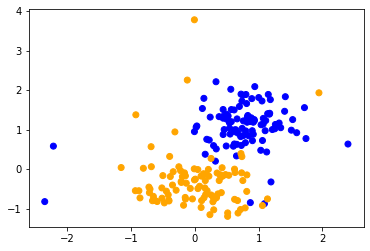

In [18]:
def generate_data(size=100):
    size_1 = round(size*.0909)
    cov = np.identity(2)
    classes = {
        'blue':np.array([1,0]).T,
        'orange':np.array([0,1]).T
    }
    dfs = []
    for G in classes.keys():
        means = np.random.multivariate_normal(classes[G],cov,size=size_1)
        classes[G] = np.append(means,np.random.multivariate_normal(random.choice(means),cov/5,size=size-size_1),axis=0)

        df = pd.DataFrame(classes[G],columns=['X_1','X_2'])
        df['Y']=G
        dfs.append(df)
    df=dfs[0].append(dfs[1])
    return df
df = generate_data()

import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(df['X_1'],df['X_2'],c=df['Y'])
plt.show()

In [22]:
m = np.array([1,0]).T
cov = np.identity(2)

In [24]:
means = np.random.multivariate_normal(m,cov,size=10)
means

array([[-0.29808972,  0.68637367],
       [-0.33842167, -1.65824952],
       [ 1.99464581,  0.04118174],
       [ 0.97846385, -1.48676976],
       [-0.03054831,  0.47175867],
       [ 2.87410008, -1.1662395 ],
       [ 2.79764746, -1.36382414],
       [ 0.38291706,  1.00741448],
       [ 0.52294816,  0.89991862],
       [ 0.72489563, -0.89770191]])

In [27]:
np.random.multivariate_normal(means[0],cov/5)

array([-0.22767859,  0.66870155])

In [34]:
observations = np.array([])
count = 1
for i in range(0,100):
    while count < 100:
        np.append(observations,
              np.random.multivariate_normal(random.choice(means),cov/5))
        count

array([ 2.58036116, -1.6685941 ])

In [32]:
observations

array([], dtype=float64)